In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [118]:
data = pd.read_csv("C:/Users/ncmia/OneDrive/Desktop/Depression_Student_Dataset_Unclean.csv")
data.head()

,ID,Gender,Age,Academic Pressure,Sleep Duration,Dietary Habits,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,Male,28.0,2.0,7-8 hours,Moderate,9.0,2.0,Yes,No
1,2,Male,28.0,NaN,5-6 hours,Healthy,7.0,NaN,Yes,No
2,3,Male,25.0,1.0,5-6 hours,Unhealthy,10.0,4.0,No,Yes
3,4,Male,23.0,1.0,More than 8 hours,Unhealthy,7.0,2.0,Yes,No
4,5,Female,31.0,1.0,More than 8 hours,Healthy,4.0,2.0,Yes,No


In [119]:
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                502 non-null    int64  
 1   Gender                            502 non-null    object 
 2   Age                               452 non-null    float64
 3   Academic Pressure                 446 non-null    float64
 4   Sleep Duration                    487 non-null    object 
 5   Dietary Habits                    492 non-null    object 
 6   Study Hours                       450 non-null    float64
 7   Financial Stress                  450 non-null    float64
 8   Family History of Mental Illness  489 non-null    object 
 9   Depression                        502 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 39.3+ KB
None

Summary Statistics:
               ID         Age  Acad

In [120]:
if 'ID' in data.columns:
    data.drop(columns=['ID'], inplace=True)

In [121]:
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  

In [122]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Gender                               0
Age                                 50
Academic Pressure                   56
Sleep Duration                       0
Dietary Habits                       0
Study Hours                         52
Financial Stress                    52
Family History of Mental Illness     0
Depression                           0
dtype: int64


In [123]:
numerical_columns = ['Age', 'Academic Pressure', 'Study Hours', 'Financial Stress']

mean_values = data[numerical_columns].median()

data[numerical_columns] = data[numerical_columns].fillna(mean_values)
print(data.isnull().sum())

Gender                              0
Age                                 0
Academic Pressure                   0
Sleep Duration                      0
Dietary Habits                      0
Study Hours                         0
Financial Stress                    0
Family History of Mental Illness    0
Depression                          0
dtype: int64


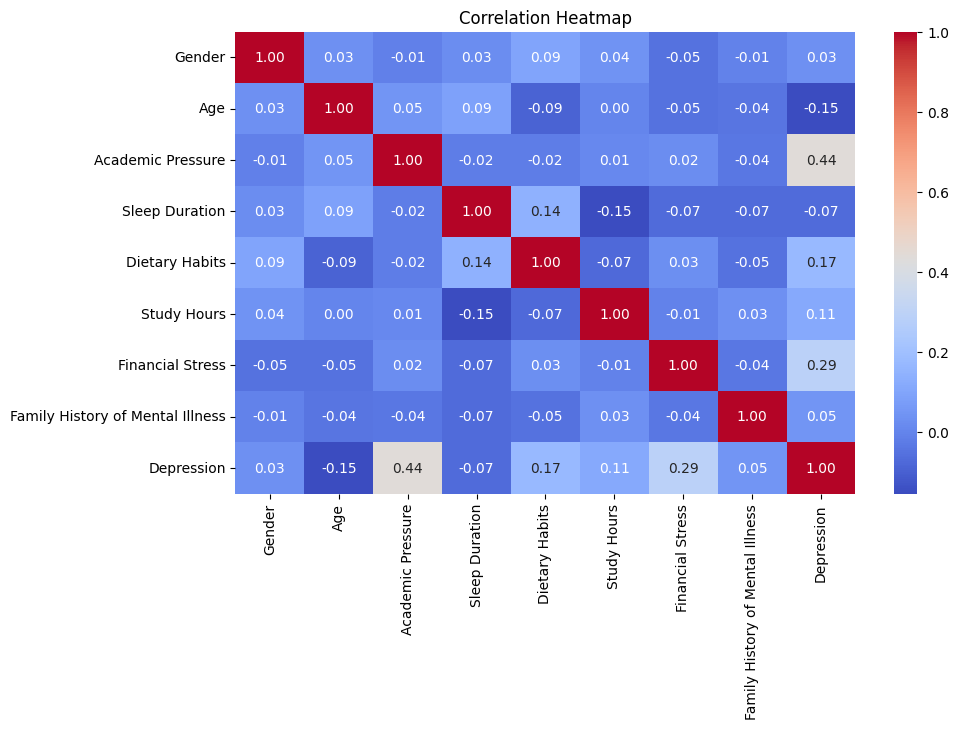

In [124]:
data = pd.get_dummies(data, drop_first=True)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [125]:
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Convert categories to numerical values
    label_encoders[col] = le

In [126]:
X = data.drop(columns=['Depression'])  # Features
y = data['Depression']  # Target

In [127]:
from sklearn.model_selection import train_test_split

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [128]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train = scaler.fit_transform(X_train)

# Transform test data
X_test = scaler.transform(X_test)


In [129]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Build MLP Model
clf = MLPClassifier(hidden_layer_sizes=(6, 5),
                    activation='relu',
                    solver='adam',
                    random_state=5,
                    verbose=True,
                    max_iter=500,
                    learning_rate_init=0.01)



In [130]:
# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.71304200
Iteration 2, loss = 0.68664312
Iteration 3, loss = 0.66748113
Iteration 4, loss = 0.65326621
Iteration 5, loss = 0.64226794
Iteration 6, loss = 0.63250159
Iteration 7, loss = 0.62510793
Iteration 8, loss = 0.61626778
Iteration 9, loss = 0.60867399
Iteration 10, loss = 0.60055616
Iteration 11, loss = 0.59267377
Iteration 12, loss = 0.58458291
Iteration 13, loss = 0.57691036
Iteration 14, loss = 0.56833958
Iteration 15, loss = 0.56101637
Iteration 16, loss = 0.55318226
Iteration 17, loss = 0.54575616
Iteration 18, loss = 0.53948260
Iteration 19, loss = 0.53138380
Iteration 20, loss = 0.52548496
Iteration 21, loss = 0.51897311
Iteration 22, loss = 0.51170948
Iteration 23, loss = 0.50581646
Iteration 24, loss = 0.49988174
Iteration 25, loss = 0.49494543
Iteration 26, loss = 0.48977074
Iteration 27, loss = 0.48540717
Iteration 28, loss = 0.48013551
Iteration 29, loss = 0.47625249
Iteration 30, loss = 0.47173831
Iteration 31, loss = 0.46843491
Iteration 32, los

C:\Users\ncmia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [131]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68        71
           1       0.72      0.68      0.70        80

    accuracy                           0.69       151
   macro avg       0.69      0.69      0.69       151
weighted avg       0.69      0.69      0.69       151

Confusion Matrix:
 [[50 21]
 [26 54]]


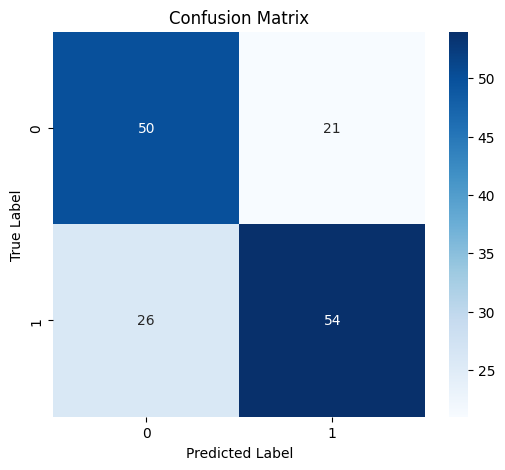

In [132]:
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


C:\Users\ncmia\AppData\Local\Temp\ipykernel_23964\4048832839.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


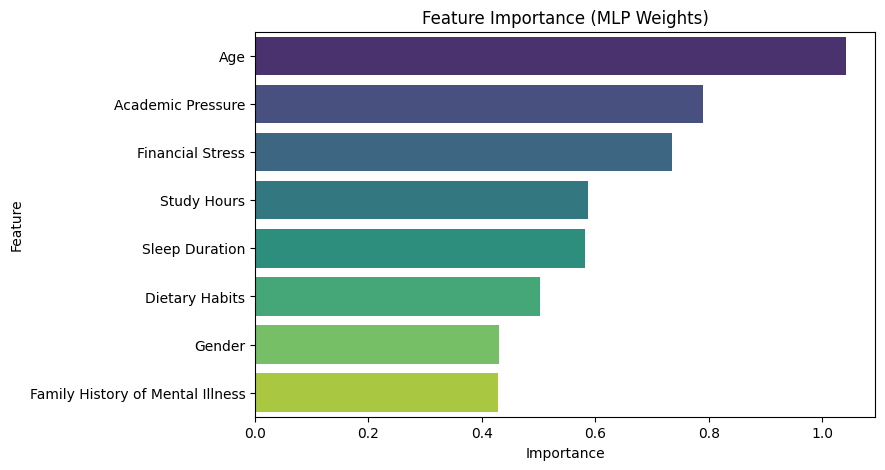

In [133]:
import numpy as np

# Extract feature importance using absolute mean weights
feature_importance = np.mean(np.abs(clf.coefs_[0]), axis=1)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance (MLP Weights)")
plt.show()


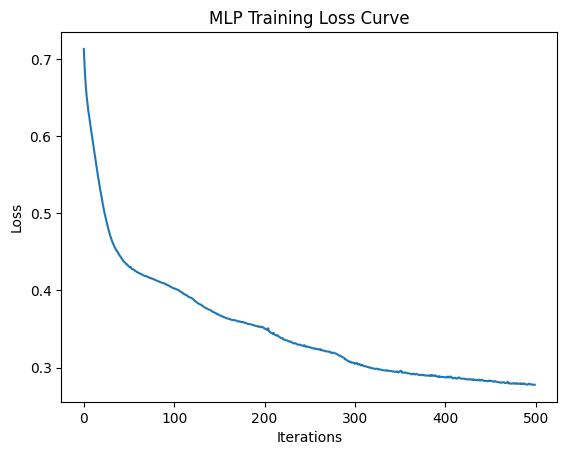

In [134]:
# Plot the loss curve
plt.plot(clf.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("MLP Training Loss Curve")
plt.show()


In [135]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 68.87%
